In [2]:
%pylab inline
import pandas as pd
pd.set_option('display.precision', 5)

Populating the interactive namespace from numpy and matplotlib


In [3]:
# 動特性の２乗和分解
def dynamicProp(M,A, calcSN=False, calcS=False, calcB=False, calcStandardSN=False):
    # Degree of Freedom
    Ft = len(A.index)*len(A.columns)
    Fb = 1
    Fnb = len(A.index) - 1
    Fe = Ft - Fb - Fnb
    Fn = Fnb + Fe
    # Squared Sum
    St = (A*A).sum().sum() #eq(4.7)
    L = np.asarray(A).dot(M) # A[3,3]とM[3,1]の行列積[3,1]
    r = (M*M).sum()
    Sb = (L.sum())**2/len(A.index)/r #eq(4.8)
    Snb = (L*L).sum()/r - Sb #eq(4.9)
    Se = St - Sb - Snb
    Sn = Snb + Se
    # Variance
    Vb = Sb/Fb
    Vnb = Snb/Fnb
    Ve = Se/Fe
    Vn = Sn/Fn
    
    # calcSNratio[db]
    if calcSN==True:
        eta = (1./len(A.index)/r*(Sb-Ve))/Vn #eq(4.15)
        return 10*np.log10(eta)
    
    # calc Standard SN ratio[db]
    if calcStandardSN==True:
        eta = (Sb-Ve)/Vn #eq(7.8)
        return 10*np.log10(eta)
    
    # calcS[db]
    if calcS==True:
        S = (1./len(A.index)/r*(Sb-Ve))
        return 10*np.log10(S)
    
    # calcB
    if calcB==True:
        beta = L.mean()/r
        return beta
    
    # PrintTable
    data = {'F': [Fb,Fnb,Fe,Fn,Ft], 'S':[Sb,Snb,Se,Sn,St], 'V':[Vb,Vnb,Ve,Vn,nan]}
    df = pd.DataFrame(data=data, index=["b","N*b","e","(N)","T"])
    print df

## 2ヶ月目 - 問1
>プリント基板とICの電気的接続条件として、$A_1, A_2$がある。接続状態が良好であれば、基盤とIC間の電流M(A)と発生する電圧y(V)の間には、$y=\beta{M}$が成立する。<br>
$A_1, A_2$の2条件について、電流Mを
$$M_1=0.001, M_2=0.005, M_3=0.010 (A)$$
として、接続直後$N_1$、劣化試験後$N_2$の2時点における電圧y(V)を求めたデータは以下のようである。

M
[ 0.001  0.005  0.01 ]

A1
      M1     M2     M3
N1  2.81  14.50  29.03
N2  3.68  18.45  37.61

A2
      M1     M2     M3
N1  3.08  15.40  30.80
N2  3.48  17.42  34.82


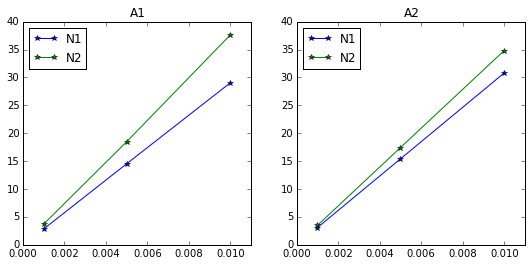

In [4]:
M = np.asarray([0.001, 0.005, 0.010])
A1 = pd.DataFrame([[2.81,14.50,29.03],
                  [3.68,18.45,37.61]],
                 index=["N1","N2"],
                 columns=["M1","M2","M3"])
A2 = pd.DataFrame([[3.08,15.40,30.80],
                  [3.48,17.42,34.82]],
                 index=["N1","N2"],
                 columns=["M1","M2","M3"])
print "M\n",M
print "\nA1\n",A1
print "\nA2\n",A2

fig = figure(figsize=(9,4))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.plot(M,A1.T,'*-')
ax2.plot(M,A2.T,'*-')
ax1.set_title("A1")
ax2.set_title("A2")
ax1.legend(["N1","N2"],loc="best")
ax2.legend(["N1","N2"],loc="best")
ax1.set_xlim(0,0.011)
ax1.set_ylim(0,40)
ax2.set_xlim(0,0.011)
ax2.set_ylim(0,40)
plt.show()

###1) $A_1, A_2$別に、2乗和の分解を行え。

In [5]:
print "A1の2乗和分解表"
dynamicProp(M,A1)    

A1の2乗和分解表
     F          S          V
b    1  2784.2888  2784.2888
N*b  1    44.9413    44.9413
e    4     0.1139     0.0285
(N)  5    45.0552     9.0110
T    6  2829.3440        NaN


In [6]:
print "A2の2乗和分解表"
dynamicProp(M,A2)

A2の2乗和分解表
     F          S          V
b    1  2713.0852  2713.0852
N*b  1    10.2004    10.2004
e    4     0.0001     0.0000
(N)  5    10.2004     2.0401
T    6  2723.2856        NaN


###2) 各項の意味を考えた上で、接続条件としてどちらの条件がよいかを判断できるかどうかを検討し、結論を述べよ。判断に至った理由も述べよ。

####結論
A2の条件の方が良い

#### 理由
(1)より、A1とA2の$S_T$の値にあまり差がない一方で、<br>
A1の方が、$劣化による誤差成分S_{N\times{b}}, そのたの誤差成分S_e$の値が有意に大きいため。

###3) $A_1, A_2$のSN比を求め、(2)の結論と比較し、どのようなことがいえるか。

SN比は次の式で求める。
$$ \eta = 10log\frac{\frac{1}{nr}(S_\beta - V_e)}{V_N}$$

In [7]:
print "A1のSN比は、%.2f(db)"%dynamicProp(M,A1, calcSN=True)
print "A2のSN比は、%.2f(db)"%dynamicProp(M,A2, calcSN=True)

A1のSN比は、60.89(db)
A2のSN比は、67.22(db)


####結論
A2の条件の方がSN比が良い。(2)の結論と一致する。

In [8]:
%load_ext version_information
%version_information numpy, matplotlib, pandas, ipython, version_information

Software versions
Python 2.7.9 64bit [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.56)]
IPython 3.0.0-dev
OS Darwin 14.4.0 x86_64 i386 64bit
numpy 1.10.0.dev+a02f5c8
matplotlib 1.4.2
pandas 0.16.0
ipython 3.0.0.dev0
version_information 1.0.3
Sun Jul 26 17:28:20 2015 JST